<h1>1. Generating Random Networks</h1>

In [383]:
library('igraph')
set.seed(0)
library(ggplot2)

<h2>2a</h2>

Connected:  TRUE
Diameter of network:  21


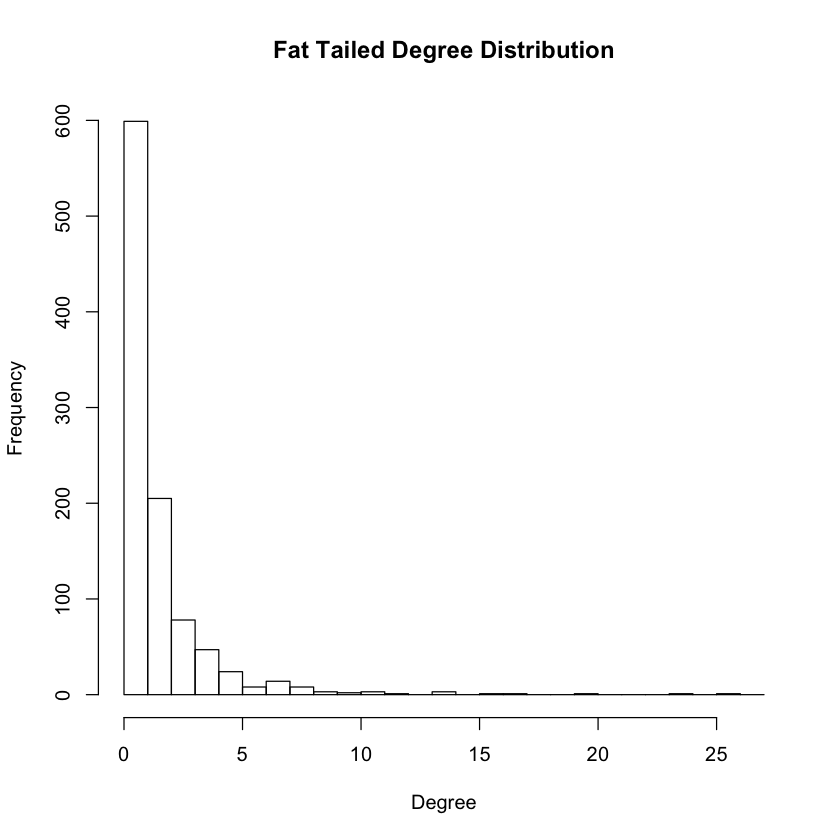

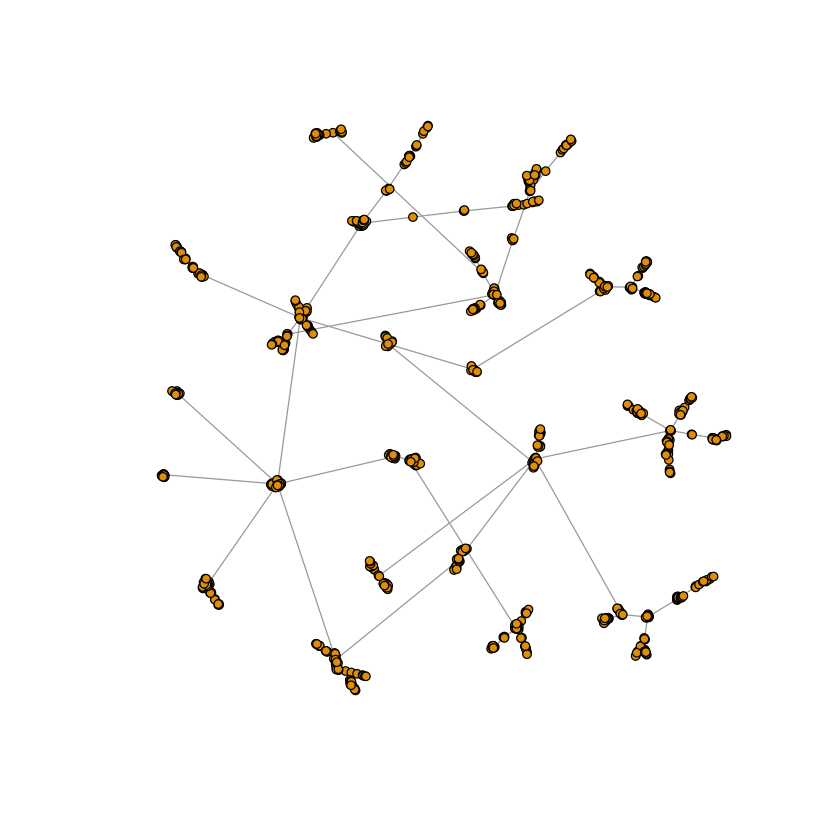

In [324]:
n = 1000
m = 1
network <- sample_pa(n=n, m=m, directed=FALSE)
#network <- barabasi.game(n, m, directed=FALSE)
writeLines(paste("Connected: ", is.connected(network)))
degree_distribution <- degree(network)
hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution")
writeLines(paste("Diameter of network: ", diameter(network)))
plot(network, vertex.label=NA, vertex.size=3)

In [295]:
for (i in 1:100) {
    n = 1000
    m = 1
    network1 <- sample_pa(n=n, m=m, directed=FALSE)
    if (!is.connected(network1)) 
        print("Not connected")
    else if (i == 100 && is.connected(network1))
        print("Always connected")
}

[1] "Always connected"


<h2>2b</h2>

Modularity:  0.934325717108502
Number of communities:  32


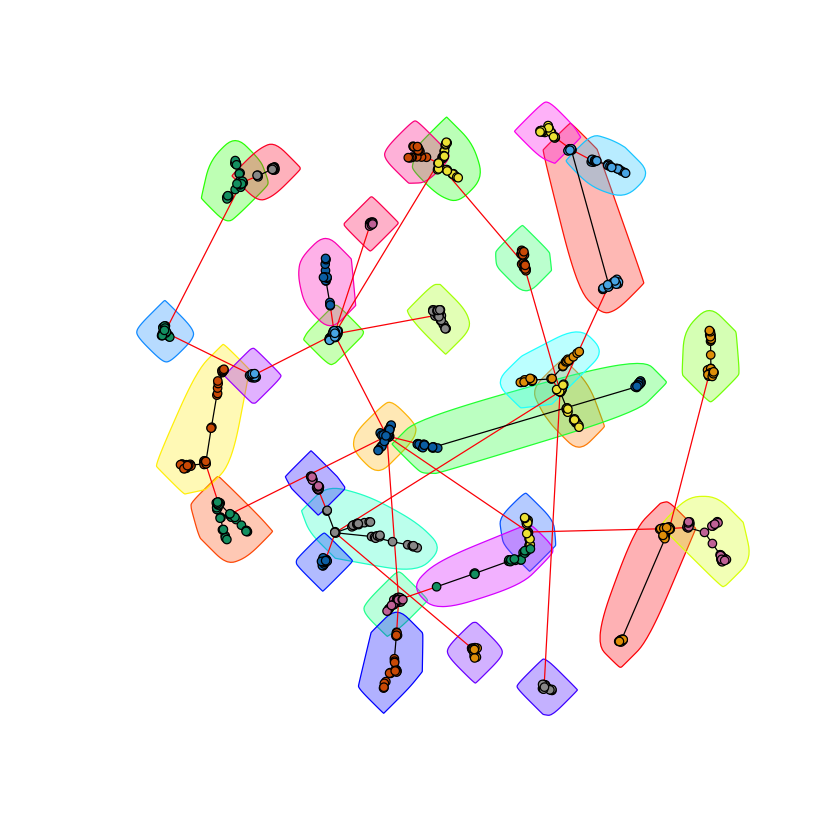

In [333]:
cluster <- clusters(network)
dg <- decompose.graph(network)
gcc = dg[[1]]
community_structure <- fastgreedy.community(gcc)
modularity <- modularity(community_structure)
writeLines(paste("Modularity: ", modularity))
writeLines(paste("Number of communities: ", length(community_structure)))
plot(community_structure, network, vertex.size=3, vertex.label=NA, edge.arrow.size=0 )

<h2>2c</h2>

Modularity:  0.978308521921313
Number of communities:  108


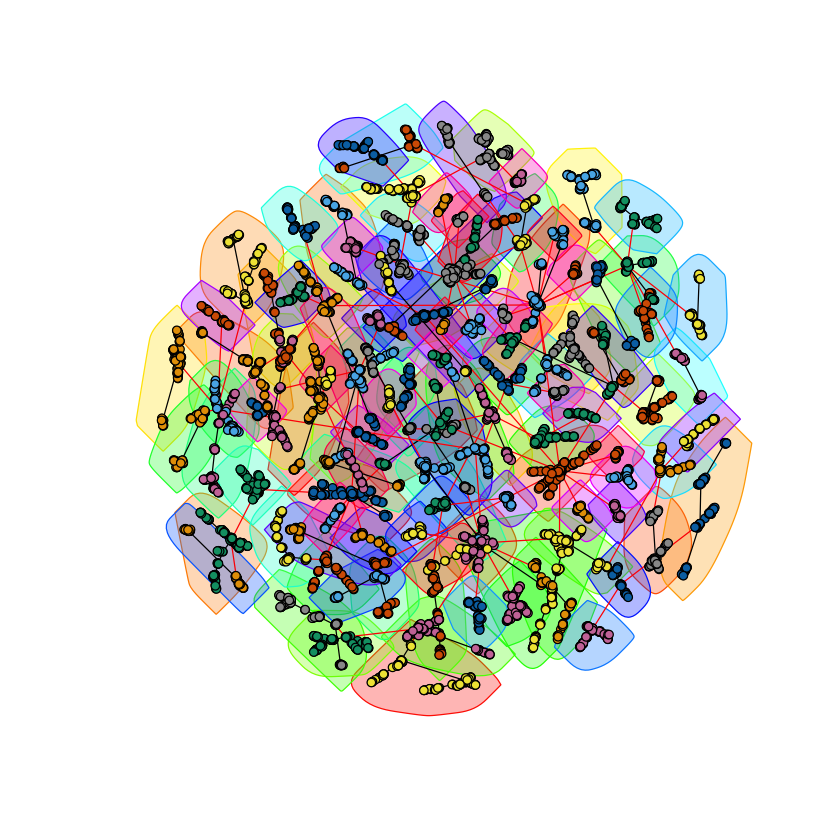

In [334]:
n = 10000
larger_network <- sample_pa(n=n, m=m, directed=FALSE)
#larger_network <- barabasi.game(n, m, directed=FALSE)
larger_cluster <- clusters(larger_network)
larger_dg <- decompose.graph(larger_network)
larger_gcc = larger_dg[[1]]
larger_community_structure <- fastgreedy.community(larger_gcc)
larger_modularity <- modularity(larger_community_structure)
writeLines(paste("Modularity: ", larger_modularity))
writeLines(paste("Number of communities: ", length(larger_community_structure)))
plot(larger_community_structure, larger_network, vertex.size=3, vertex.label=NA, edge.arrow.size=0 )

<h2>2d</h2>

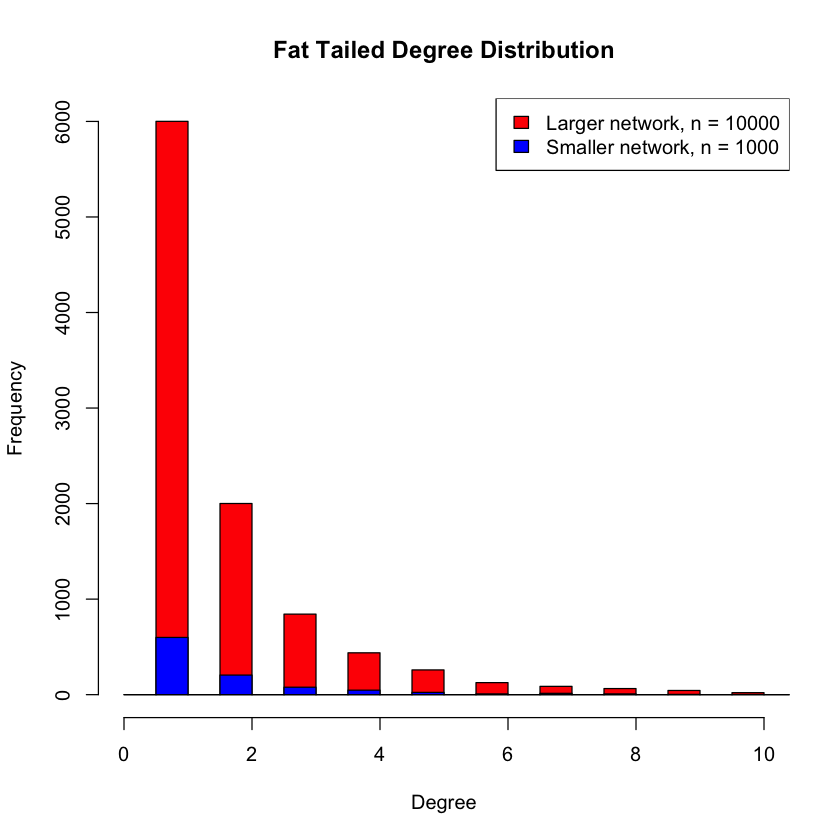

In [335]:
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,10), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution")
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Frequency", add=TRUE, main="Fat Tailed Degree Distribution")
legend("topright", legend=c("Larger network, n = 10000", "Smaller network, n = 1000"), fill=c("red", "blue"))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“36 y values <= 0 omitted from logarithmic plot”

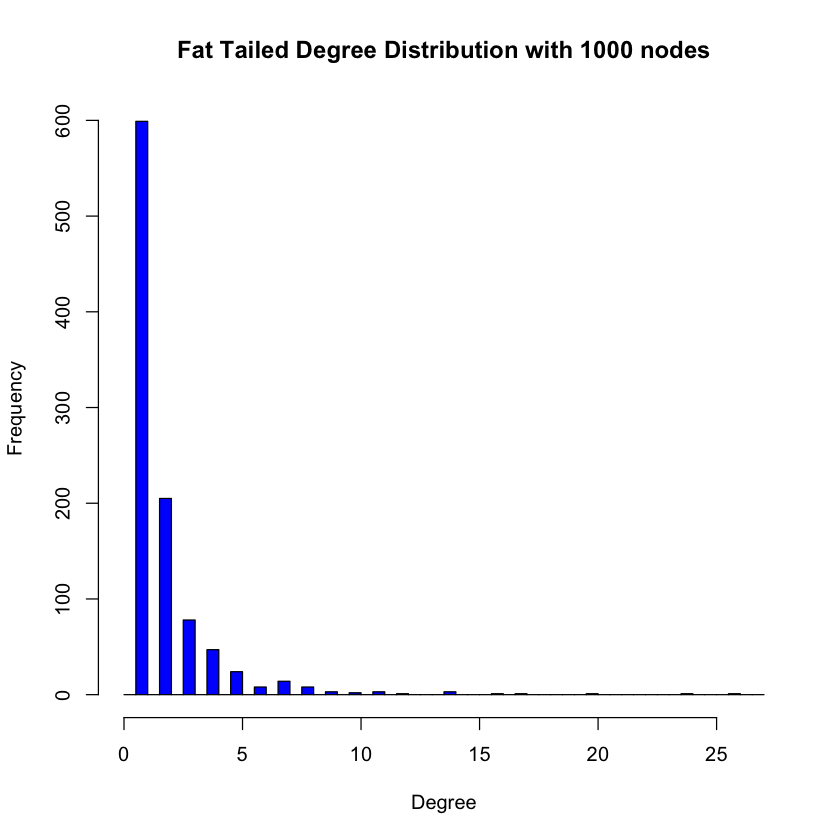

[1] 3.244723

alpha 
3.026924

[1] -647.8523

'log Lik.' -1324.439 (df=1)

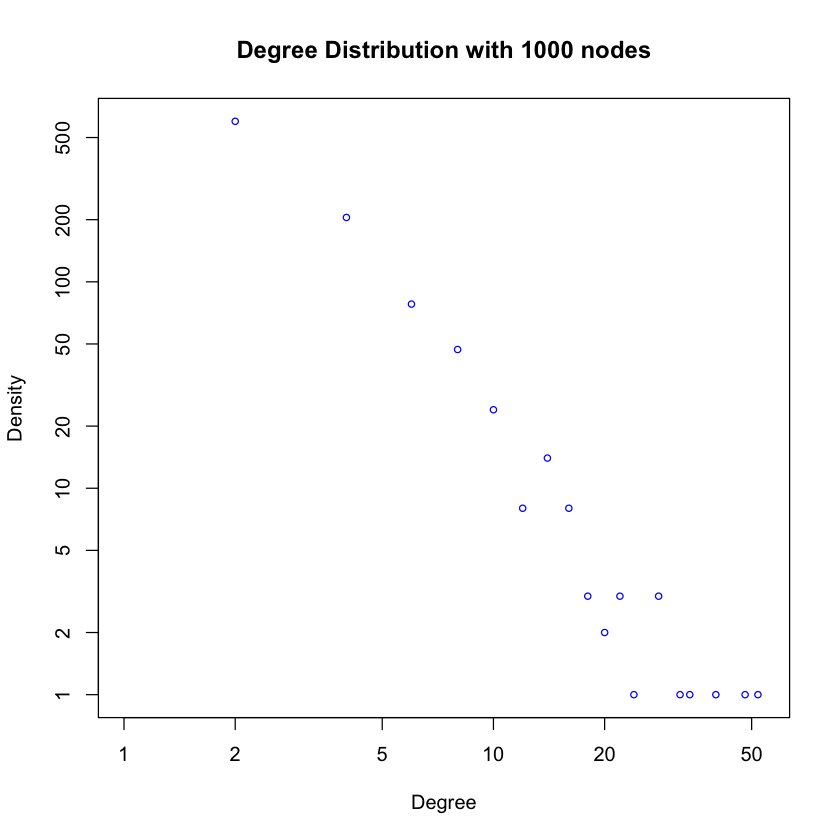

In [353]:
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution with 1000 nodes")
x1 = data.frame(x = (histogram$mids), y = (histogram$density))
plot(histogram$counts, type = "o", col="blue", main = "Degree Distribution with 1000 nodes", xlab = "Degree", ylab = "Density", log="xy", cex=0.7)
#lines(stats::lowess(x1))
#plot(x1, "line", col="blue", main = "Degree Distribution with 1000 nodes", xlab = "Degree", ylab = "Density", log="xy")
d <- degree(network, mode="in")
fit1 <- fit_power_law(d+1)
fit2 <- fit_power_law(d+1, implementation="R.mle")
fit1$alpha
stats4::coef(fit2)
fit1$logLik
stats4::logLik(fit2)


Warning message in xy.coords(x, y, xlabel, ylabel, log):
“77 y values <= 0 omitted from logarithmic plot”

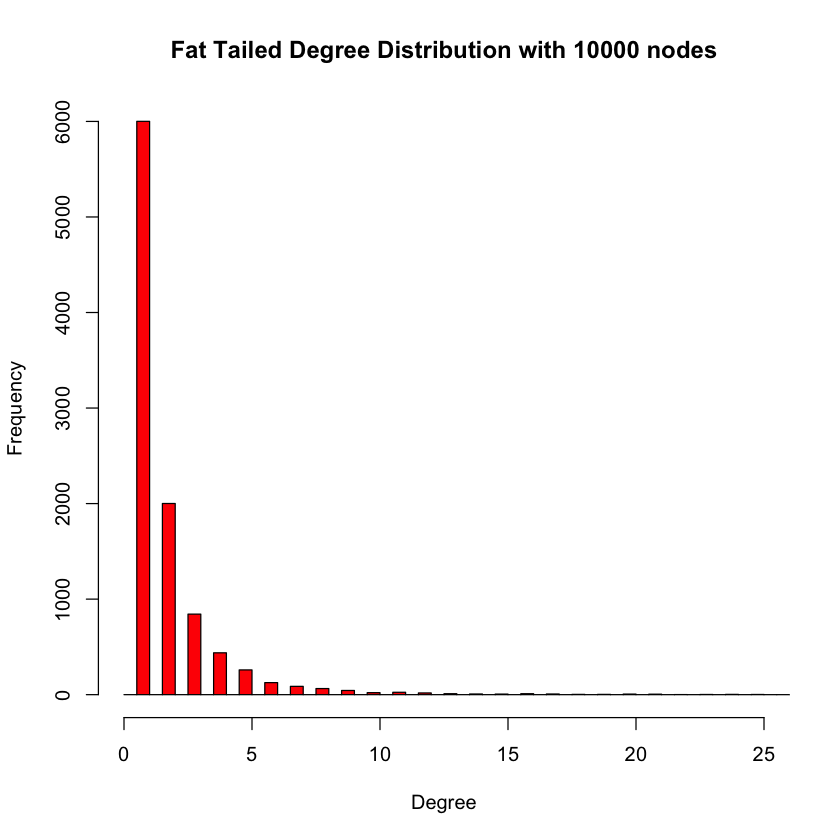

[1] 3.500033

alpha 
3.029788

[1] -2323.717

'log Lik.' -13225.45 (df=1)

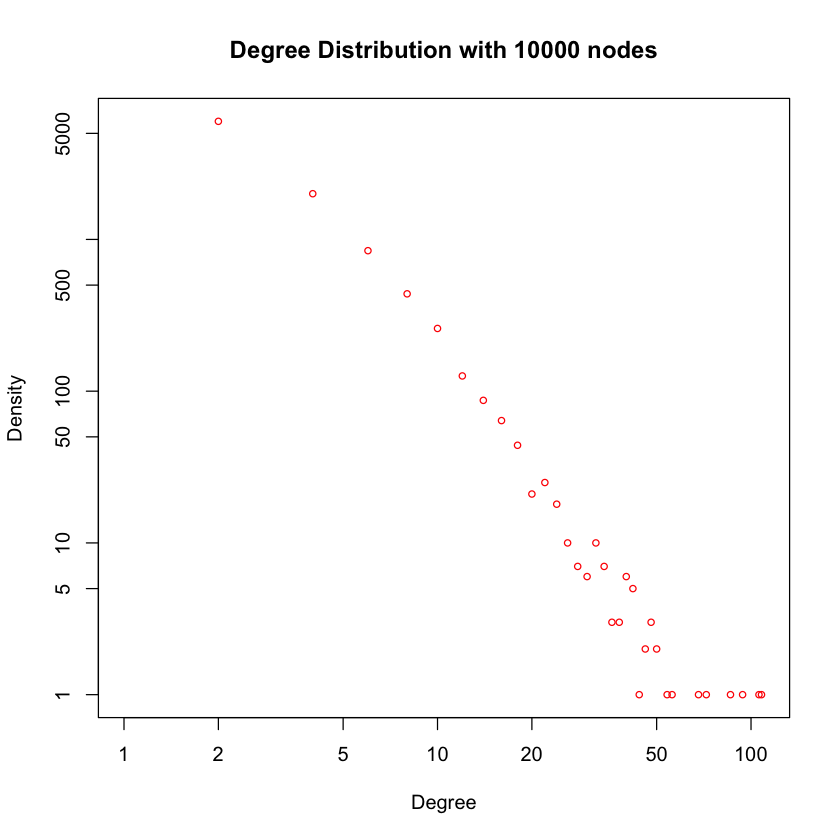

In [357]:
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,25), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution with 10000 nodes")
x2 = data.frame(x = (histogram_larger$mids), y = (histogram_larger$density))
plot(histogram_larger$counts, type = "o", col="red", main = "Degree Distribution with 10000 nodes", xlab = "Degree", ylab = "Density", log="xy", cex=0.7)
#lines(stats::lowess(histogram_larger$counts))
d <- degree(larger_network, mode="in")
fit1 <- fit_power_law(d+1)
fit2 <- fit_power_law(d+1, implementation="R.mle")
fit1$alpha
stats4::coef(fit2)
fit1$logLik
stats4::logLik(fit2)
lines(stats4::coef(fit2))

<h2>2e</h2>

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“20 y values <= 0 omitted from logarithmic plot”

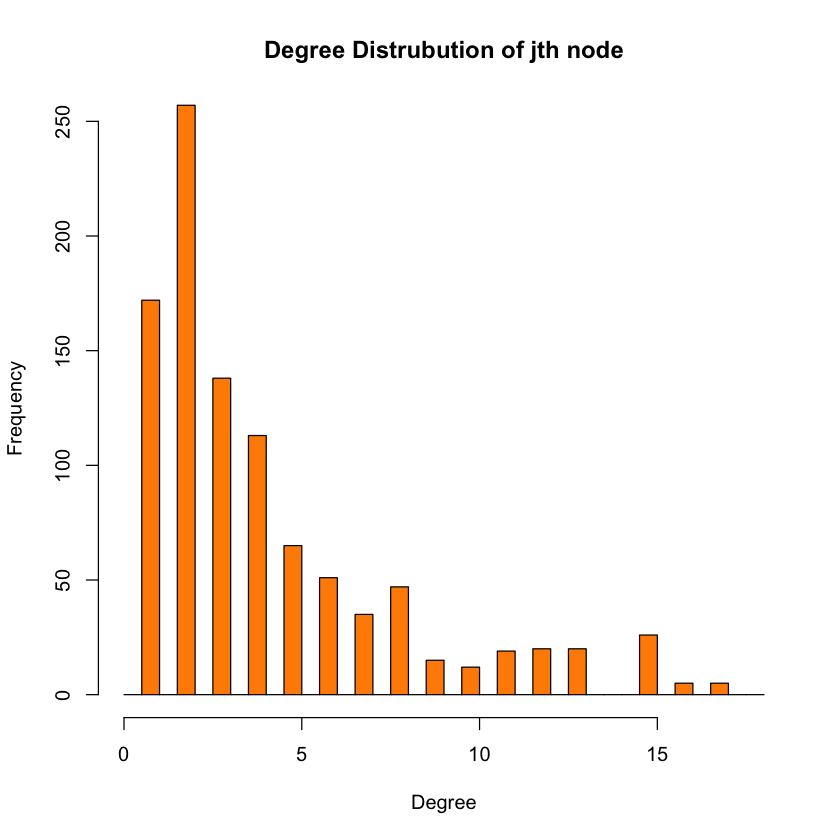

[1] 3.304776

alpha 
2.990826

[1] -661.9159

'log Lik.' -1348.649 (df=1)

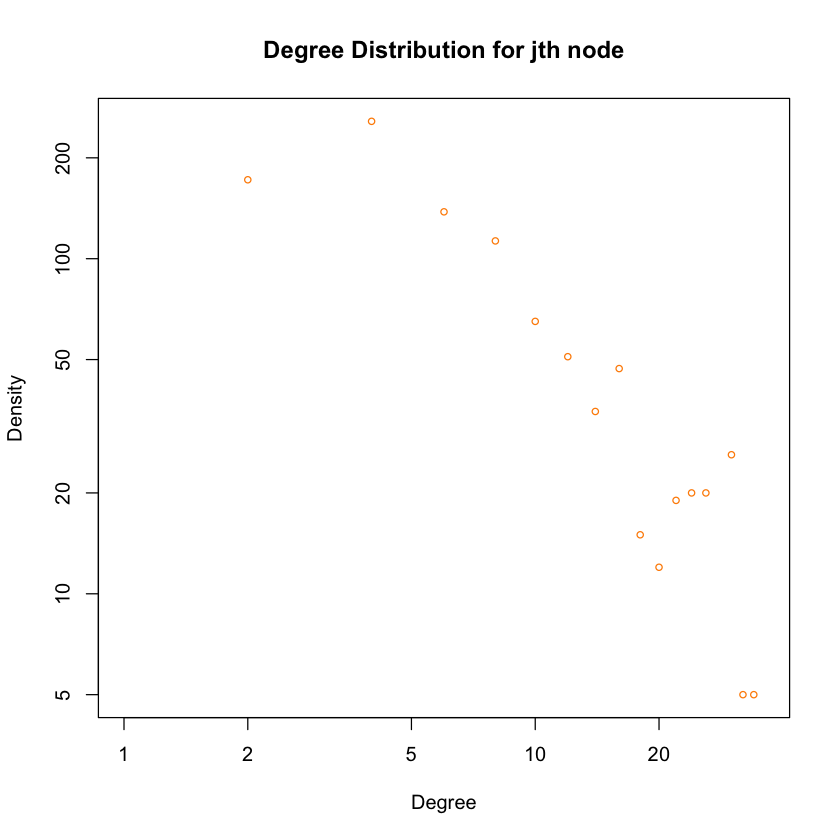

In [369]:
deg_nj <- numeric()
n = 1000
m = 1
network <- sample_pa(n=n, m=m, directed=FALSE)

for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(network, n_j))
    
}
histogram_j = hist(deg_nj, col="darkorange", breaks = seq(from = 0, to = max(deg_nj) + 1, by = 0.5), ylim=c(0,250), xlab="Degree", ylab="Frequency", main="Degree Distrubution of jth node")
#x3 = data.frame(x = (histogram_j$mids), y = (histogram_j$density))
plot(histogram_j$counts,col="darkorange", main = "Degree Distribution for jth node", xlab = "Degree", ylab = "Density", log="xy", type = "o", cex=0.7)
#plot(histogram_j$counts, log="xy", col="blue", lty=1)
#lines(stats::lowess(histogram_j$counts))
d <- degree(network, mode="in")
fit1 <- fit_power_law(d+1)
fit2 <- fit_power_law(d+1, implementation="R.mle")
fit1$alpha
stats4::coef(fit2)
fit1$logLik
stats4::logLik(fit2)


<h2>2f</h2>

In [302]:
# The maximum degree for graph with different aging exponents
g1 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=0, aging.bin=1000)
g2 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=-1,   aging.bin=1000)
g3 <- aging.prefatt.game(1000, pa.exp=1, aging.exp=-3,   aging.bin=1000)
max(degree(g1))
max(degree(g2))
max(degree(g3))

[1] 34

[1] 13

[1] 5

In [362]:
n = 1000
m = 1

age_list <- list()
degree_list <- c(0,1000)

for (i in 1:1000) {
    network <- sample_pa(n, m, directed=FALSE)
    age_list[i] = n - i
    degree_list = degree_list + degree(network)
}

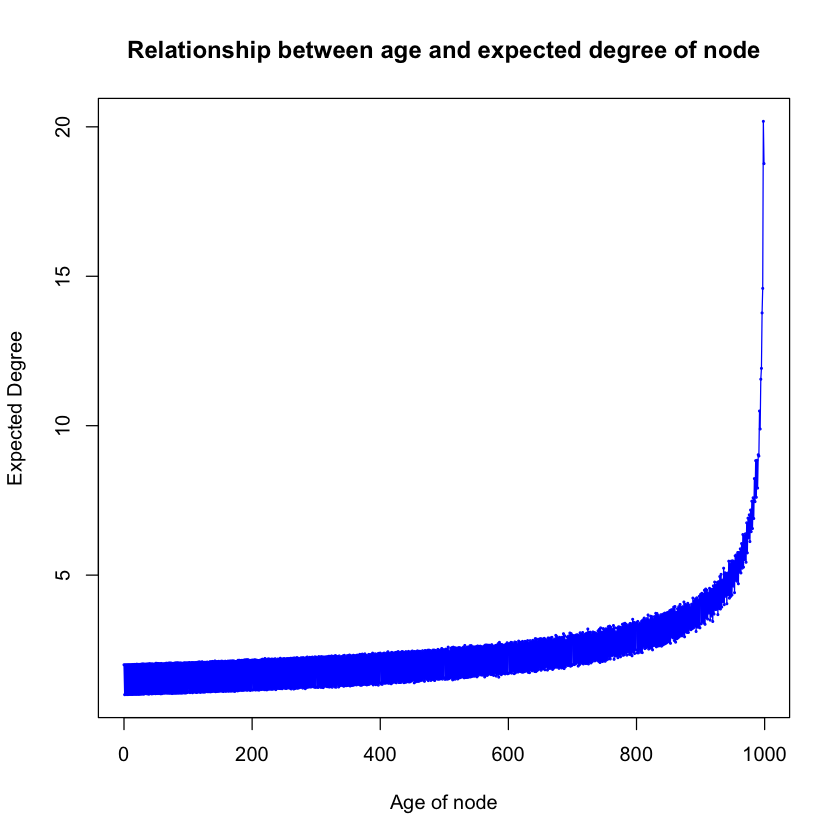

In [363]:
plot(age_list, degree_list/1000, xlab="Age of node", ylab="Expected Degree", typ="o", cex=0.2, col="blue", main="Relationship between age and expected degree of node")

<h2>2g</h2>

<h3>m = 2</h3>

Connected:  TRUE
Diameter of network:  8


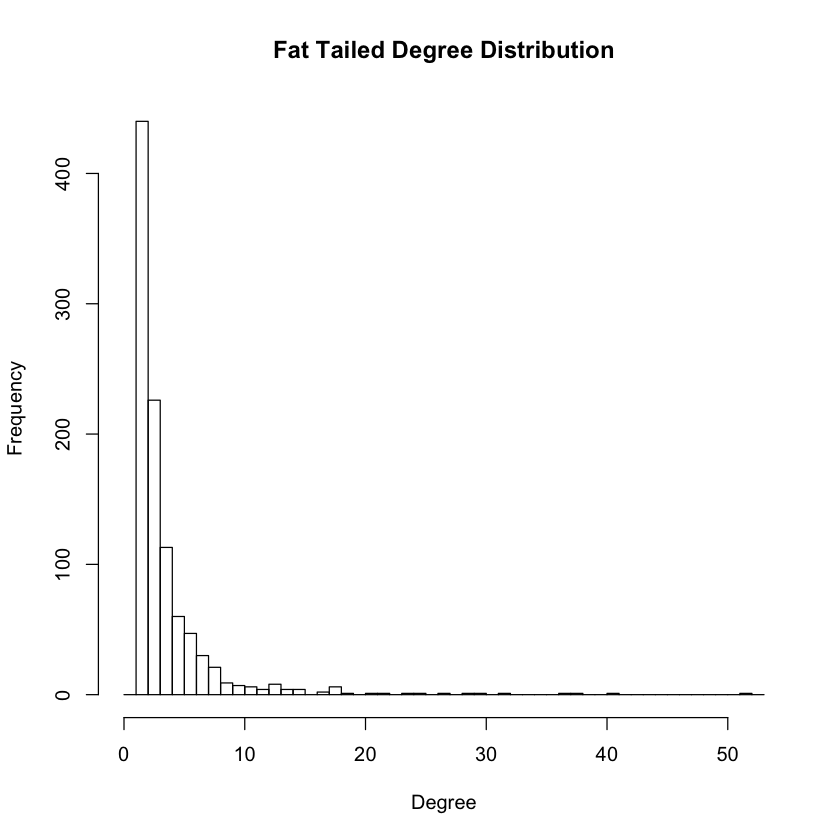

In [305]:
n = 1000
m = 2
network <- sample_pa(n=n, m=m, directed=FALSE)
#network <- barabasi.game(n, m, directed=FALSE)
writeLines(paste("Connected: ", is.connected(network)))
degree_distribution <- degree(network)
hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution")
writeLines(paste("Diameter of network: ", diameter(network)))

In [306]:
for (i in 1:100) {
    n = 1000
    m = 2
    network1 <- sample_pa(n=n, m=m, directed=FALSE)
    if (!is.connected(network1)) 
        print("Not connected")
    else if (i == 100 && is.connected(network1))
        print("Always connected")
}

[1] "Always connected"


In [307]:
#2b
cluster <- clusters(network)
dg <- decompose.graph(network)
gcc = dg[[1]]
community_structure <- fastgreedy.community(gcc)
modularity <- modularity(community_structure)
writeLines(paste("Modularity: ", modularity))

Modularity:  0.518272150338676


In [308]:
#2c
n = 10000
larger_network <- sample_pa(n=n, m=m, directed=FALSE)
#larger_network <- barabasi.game(n, m, directed=FALSE)
larger_cluster <- clusters(larger_network)
larger_dg <- decompose.graph(larger_network)
larger_gcc = larger_dg[[1]]
larger_community_structure <- fastgreedy.community(larger_gcc)
larger_modularity <- modularity(larger_community_structure)
writeLines(paste("Modularity: ", larger_modularity))

Modularity:  0.533266721768038


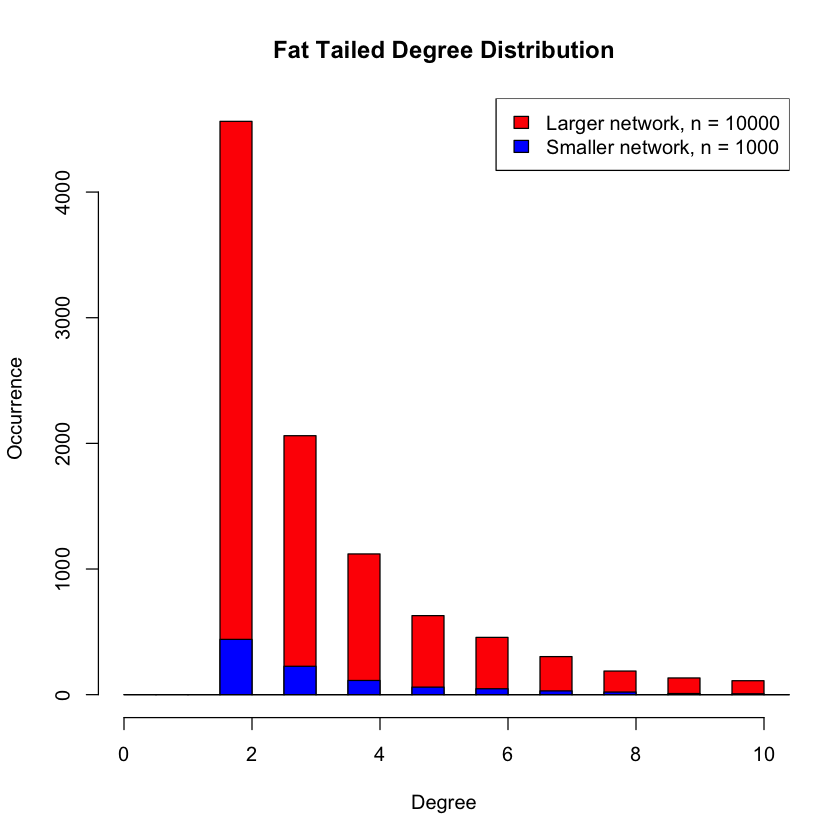

In [309]:
#2d
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,10), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution")
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Occurrence", add=TRUE, main="Fat Tailed Degree Distribution")
legend("topright", legend=c("Larger network, n = 10000", "Smaller network, n = 1000"), fill=c("red", "blue"))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“77 y values <= 0 omitted from logarithmic plot”

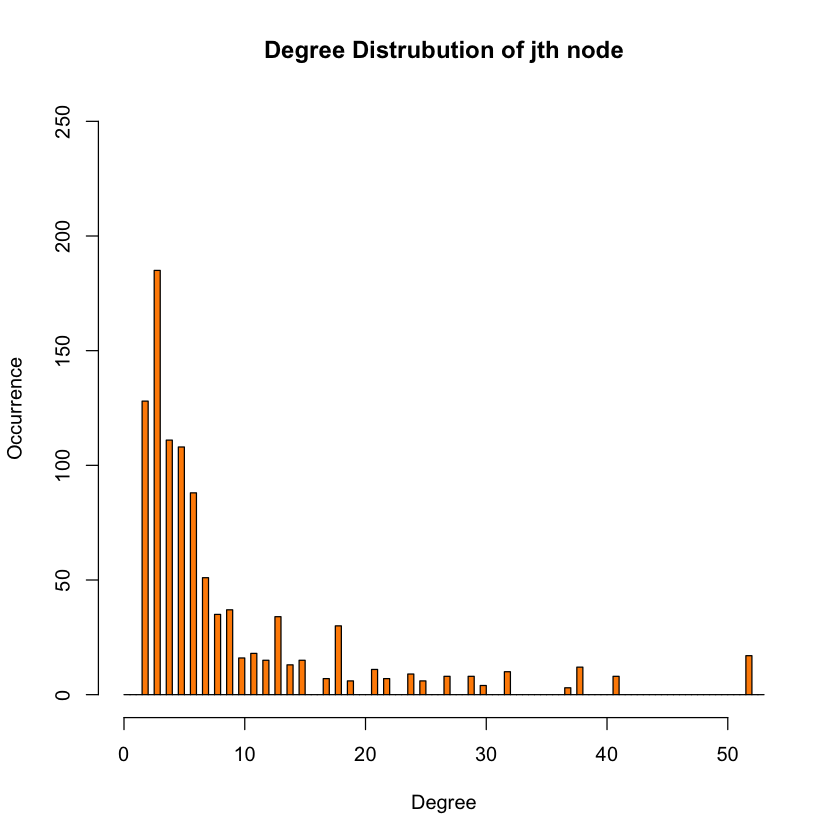

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“77 y values <= 0 omitted from logarithmic plot”

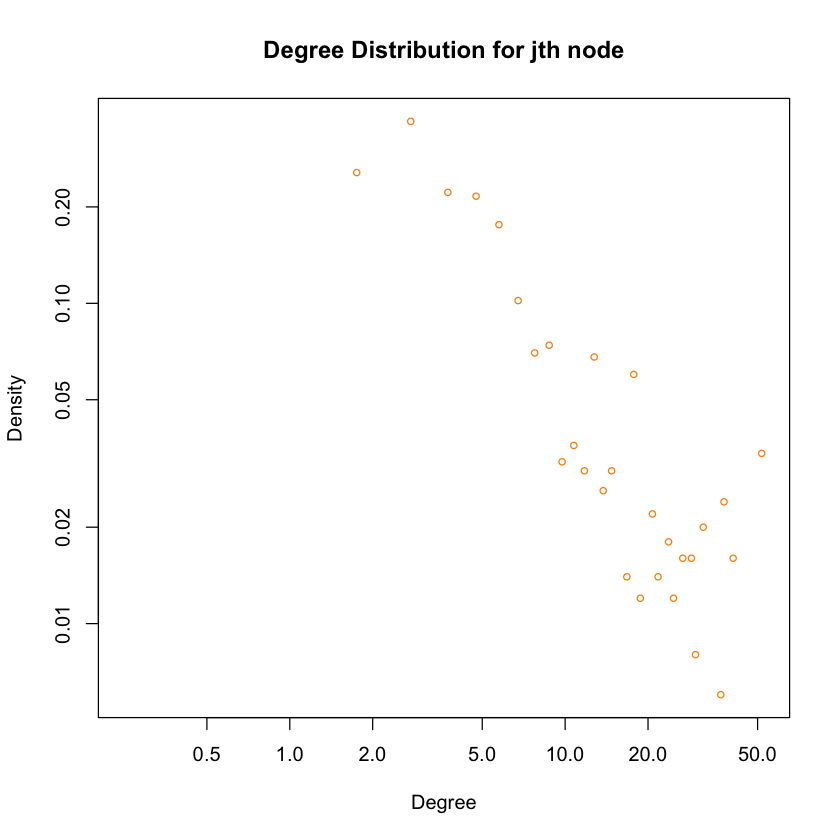

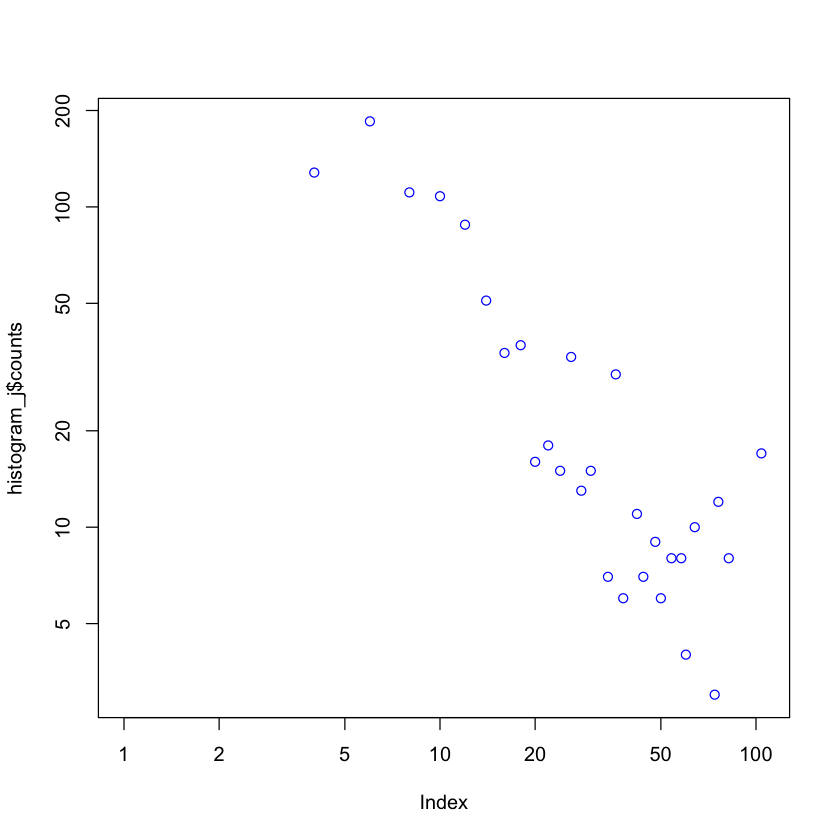

In [310]:
#2e
deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(network, n_j))
    
}
histogram_j = hist(deg_nj, col="darkorange", breaks = seq(from = 0, to = max(deg_nj) + 1, by = 0.5), ylim=c(0,250), xlab="Degree", ylab="Occurrence", main="Degree Distrubution of jth node")
x3 = data.frame(x = (histogram_j$mids), y = (histogram_j$density))
plot(x3,col="darkorange", main = "Degree Distribution for jth node", xlab = "Degree", ylab = "Density", log="xy", type = "o", cex=0.7)
plot(histogram_j$counts, log="xy", col="blue")
#lines(stats::lowess(x3))

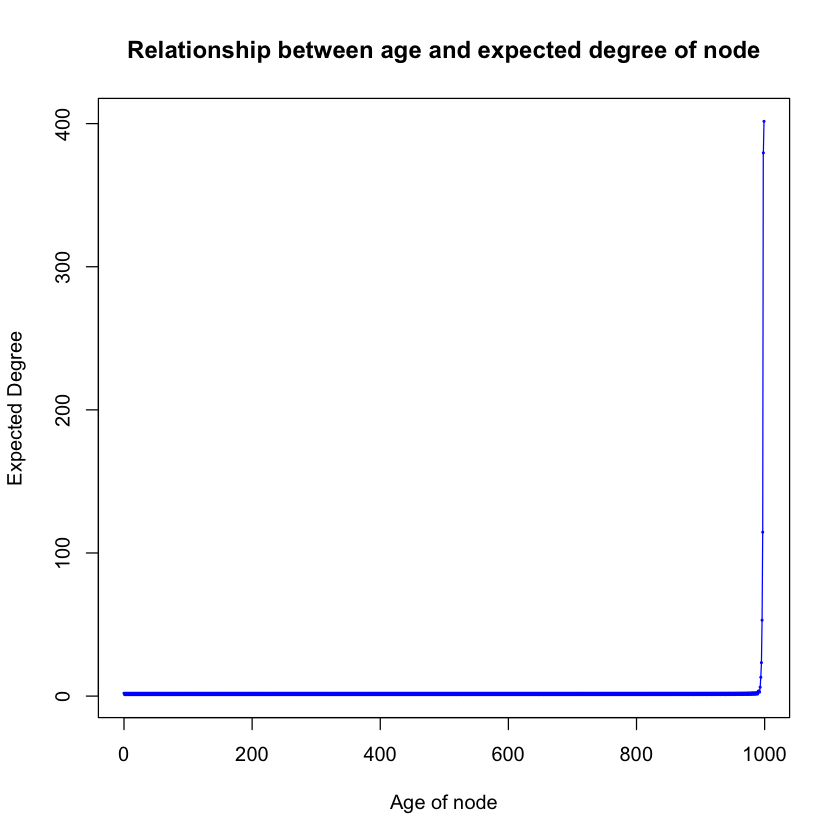

In [311]:
#2f
n = 1000
m = 2

age_list <- list()
degree_list <- c(0,1000)

for (i in 1:1000) {
    network <- barabasi.game(n, m, directed=FALSE)
    age_list[i] = n - i
    degree_list = degree_list + degree(network)
}
plot(age_list, degree_list/1000, xlab="Age of node", ylab="Expected Degree", typ="o", cex=0.2, col="blue", main="Relationship between age and expected degree of node")

<h3>m = 3</h3>

Connected:  TRUE
Diameter of network:  6


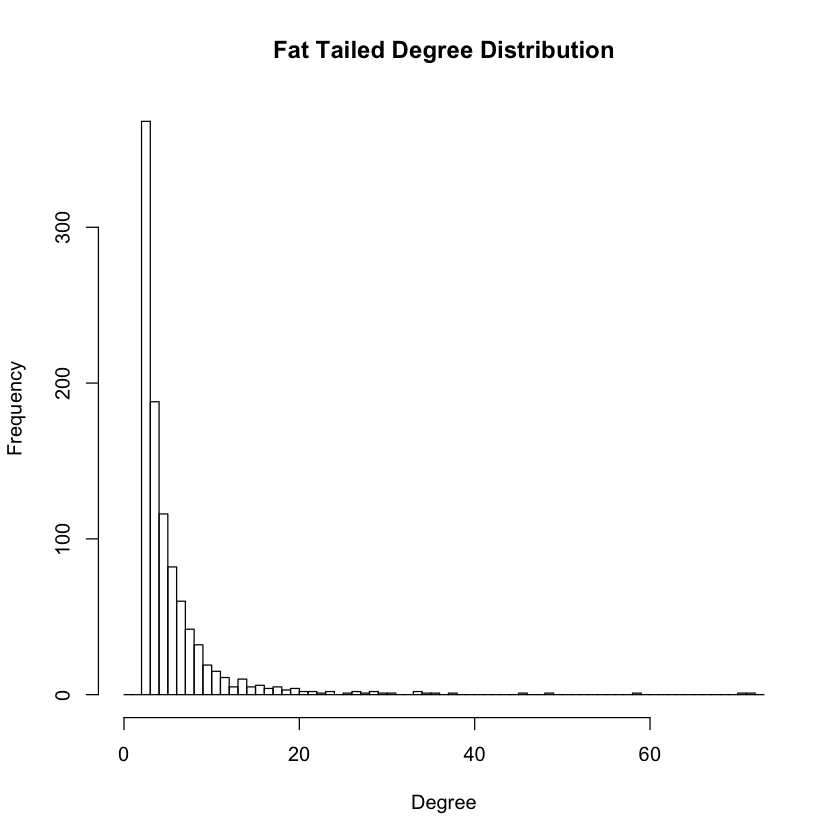

In [312]:
n = 1000
m = 3
network <- sample_pa(n=n, m=m, directed=FALSE)
#network <- barabasi.game(n, m, directed=FALSE)
writeLines(paste("Connected: ", is.connected(network)))
degree_distribution <- degree(network)
hist(degree_distribution, breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 1), xlab="Degree",ylab="Frequency", main="Fat Tailed Degree Distribution")
writeLines(paste("Diameter of network: ", diameter(network)))

In [313]:
for (i in 1:100) {
    n = 1000
    m = 3
    network1 <- sample_pa(n=n, m=m, directed=FALSE)
    if (!is.connected(network1)) 
        print("Not connected")
    else if (i == 100 && is.connected(network1))
        print("Always connected")
}

[1] "Always connected"


In [314]:
#2b
cluster <- clusters(network)
dg <- decompose.graph(network)
gcc = dg[[1]]
community_structure <- fastgreedy.community(gcc)
modularity <- modularity(community_structure)
writeLines(paste("Modularity: ", modularity))

Modularity:  0.383852262529959


In [315]:
#2c
n = 10000
larger_network <- sample_pa(n=n, m=m, directed=FALSE)
#larger_network <- barabasi.game(n, m, directed=FALSE)
larger_cluster <- clusters(larger_network)
larger_dg <- decompose.graph(larger_network)
larger_gcc = larger_dg[[1]]
larger_community_structure <- fastgreedy.community(larger_gcc)
larger_modularity <- modularity(larger_community_structure)
writeLines(paste("Modularity: ", larger_modularity))

Modularity:  0.386980419466344


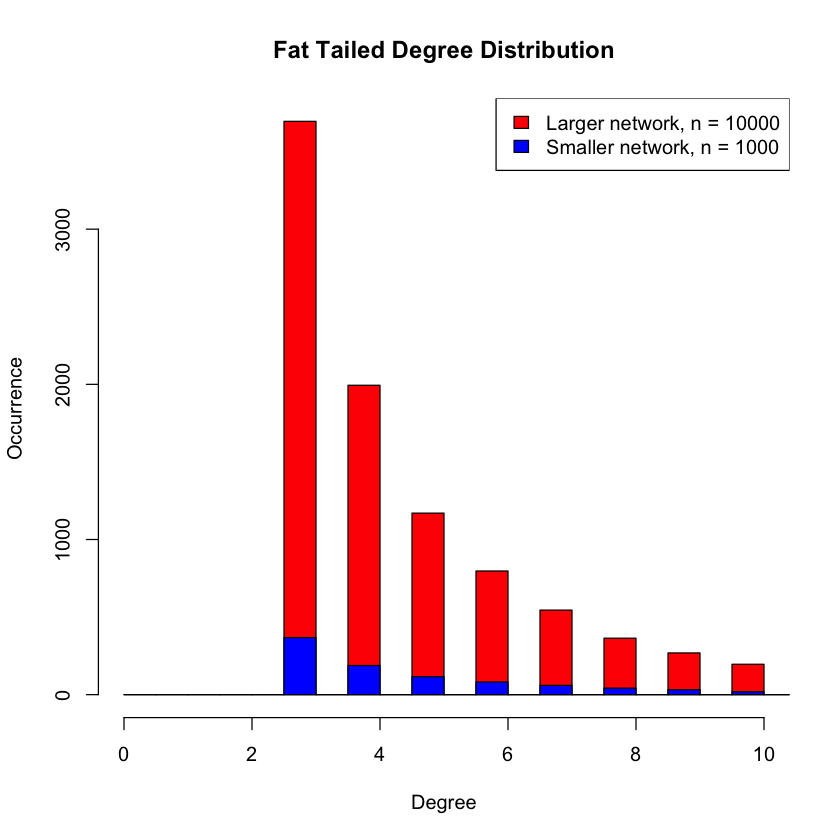

In [316]:
#2d
degree_distribution_larger <- degree(larger_network)
histogram_larger = hist((degree_distribution_larger), col="red", breaks = seq(from = 0, to = max(degree_distribution_larger) + 1, by = 0.5), xlim=c(0,10), xlab="Degree",ylab="Occurrence", main="Fat Tailed Degree Distribution")
histogram = hist((degree_distribution), col="blue", breaks = seq(from = 0, to = max(degree_distribution) + 1, by = 0.5), xlab="Degree",ylab="Occurrence", add=TRUE, main="Fat Tailed Degree Distribution")
legend("topright", legend=c("Larger network, n = 10000", "Smaller network, n = 1000"), fill=c("red", "blue"))

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“109 y values <= 0 omitted from logarithmic plot”

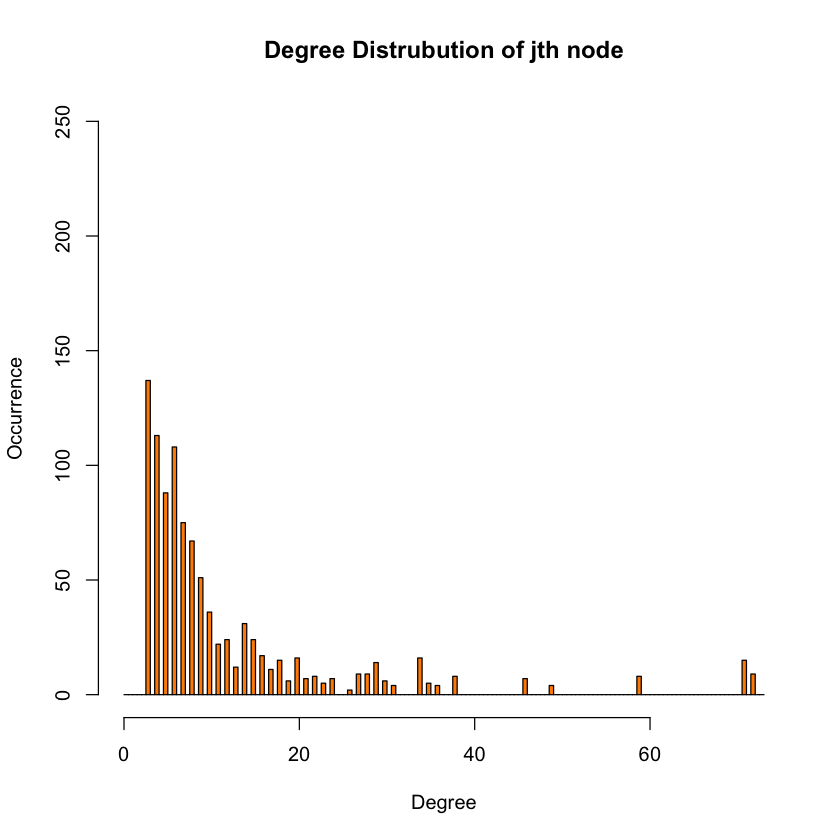

Warning message in xy.coords(x, y, xlabel, ylabel, log):
“109 y values <= 0 omitted from logarithmic plot”

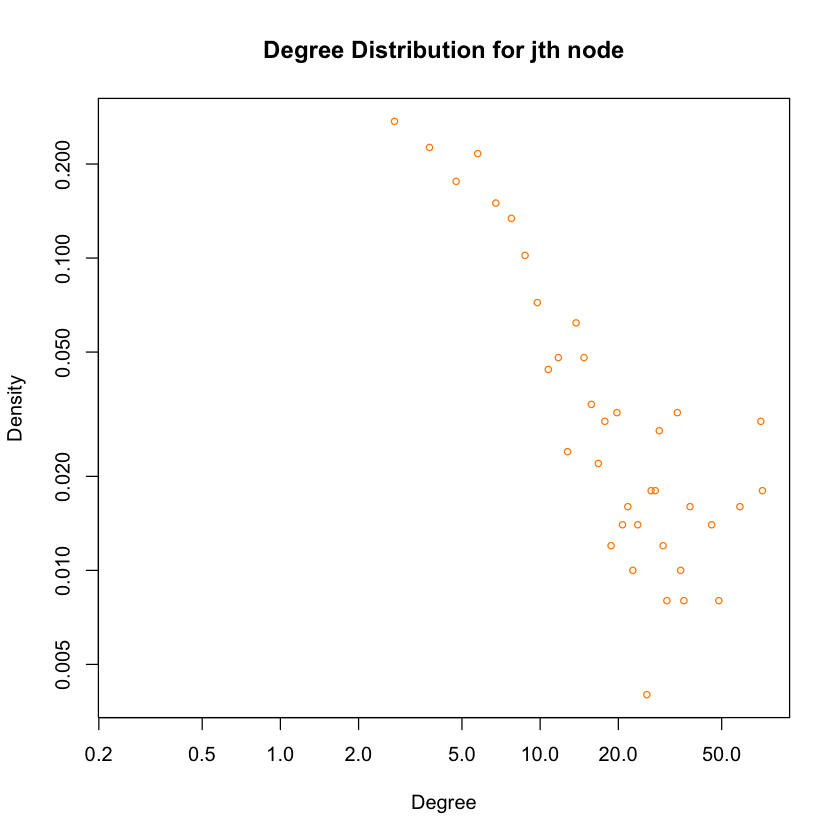

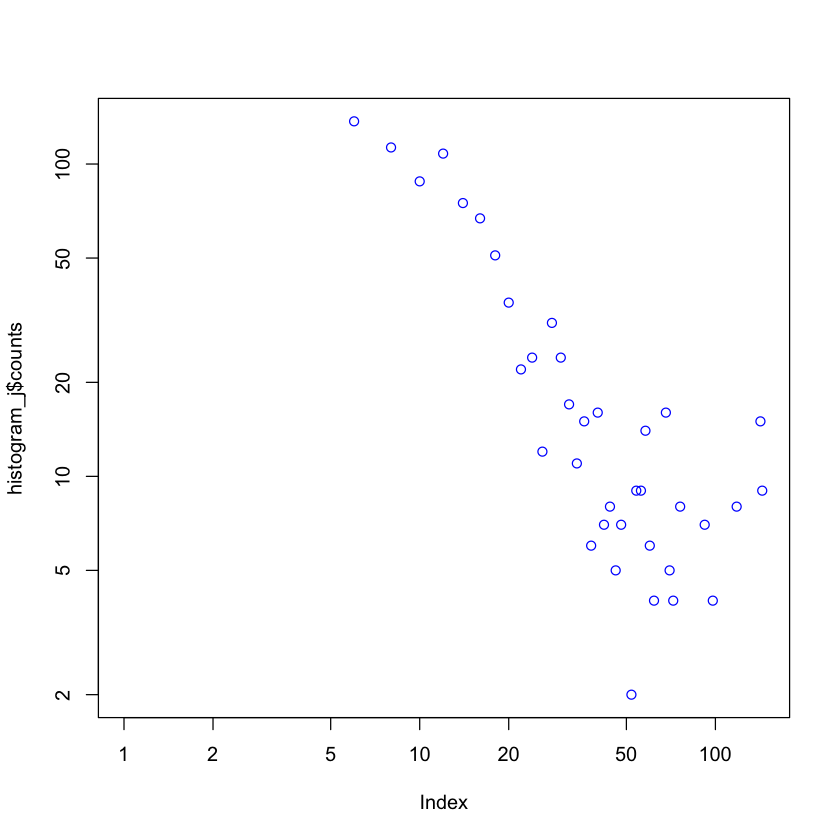

In [317]:
#2e
deg_nj <- numeric()
for (i in 1:1000) {
    #random generate a number within 1000
    n_i <- sample(1000, 1)
    
    #get its neighbor in fat tail network
    neighbor_list <- neighbors(network, n_i)
    
    #if only one neighbor
    if (length(neighbor_list) == 1) {
        n_j <- neighbor_list
    } else {
        n_j <- sample(neighbor_list, 1)
    }
    
    deg_nj <- c(deg_nj, degree(network, n_j))
    
}
histogram_j = hist(deg_nj, col="darkorange", breaks = seq(from = 0, to = max(deg_nj) + 1, by = 0.5), ylim=c(0,250), xlab="Degree", ylab="Occurrence", main="Degree Distrubution of jth node")
x3 = data.frame(x = (histogram_j$mids), y = (histogram_j$density))
plot(x3,col="darkorange", main = "Degree Distribution for jth node", xlab = "Degree", ylab = "Density", log="xy", type = "o", cex=0.7)
plot(histogram_j$counts, log="xy", col="blue")
#lines(stats::lowess(x3))

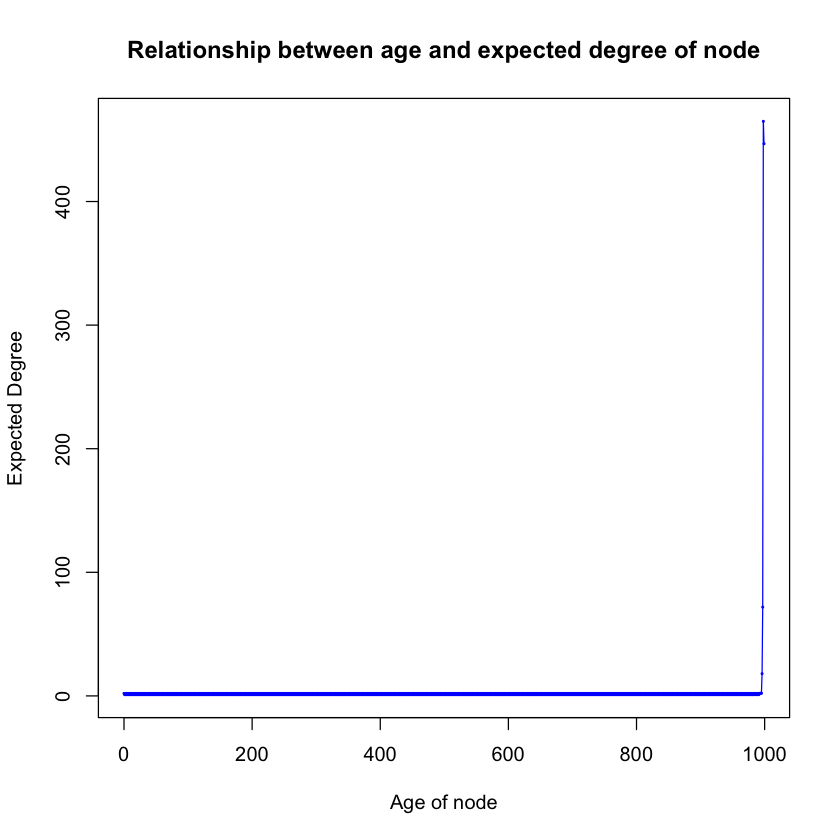

In [318]:
#2f
n = 1000
m = 3

age_list <- list()
degree_list <- c(0,1000)

for (i in 1:1000) {
    network <- barabasi.game(n, m, directed=FALSE)
    age_list[i] = n - i
    degree_list = degree_list + degree(network)
}
plot(age_list, degree_list/1000, xlab="Age of node", ylab="Expected Degree", typ="o", cex=0.2, col="blue", main="Relationship between age and expected degree of node")

<h2>2h</h2>

Modularity of network1:  0.750108869211786
Cinnectedness of network1:  FALSE
Diameter of network1:  13
Diameter of gcc1:  13
Nodes in network1:  1000
Nodes in gcc1:  84
[1] "The number of structures in the graph is 10"
[1] "The modularity of the community structure is 0.750108869211786"


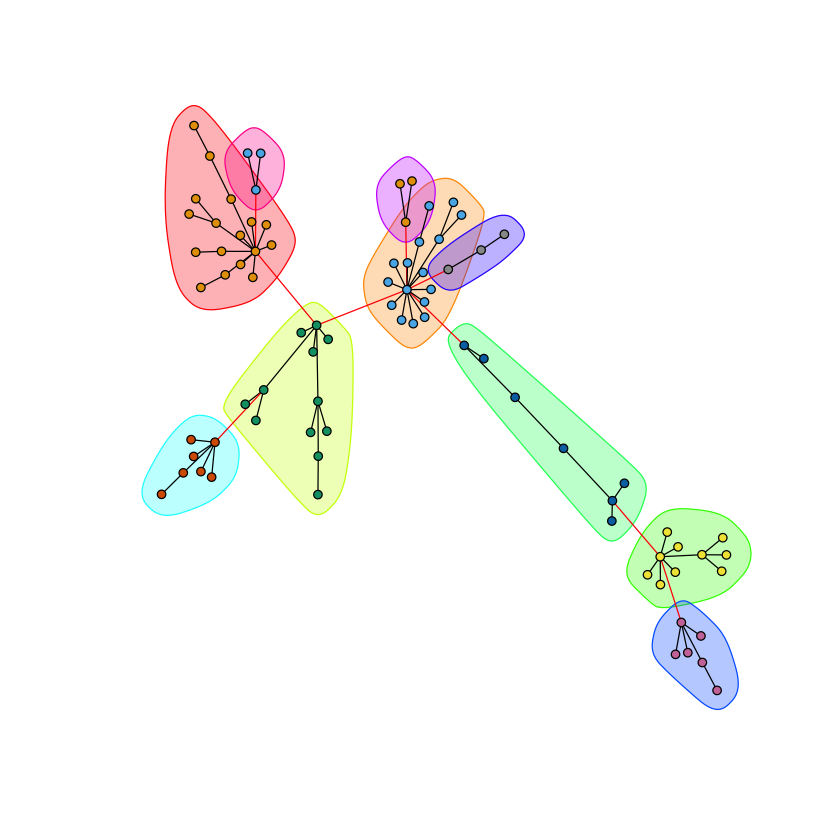

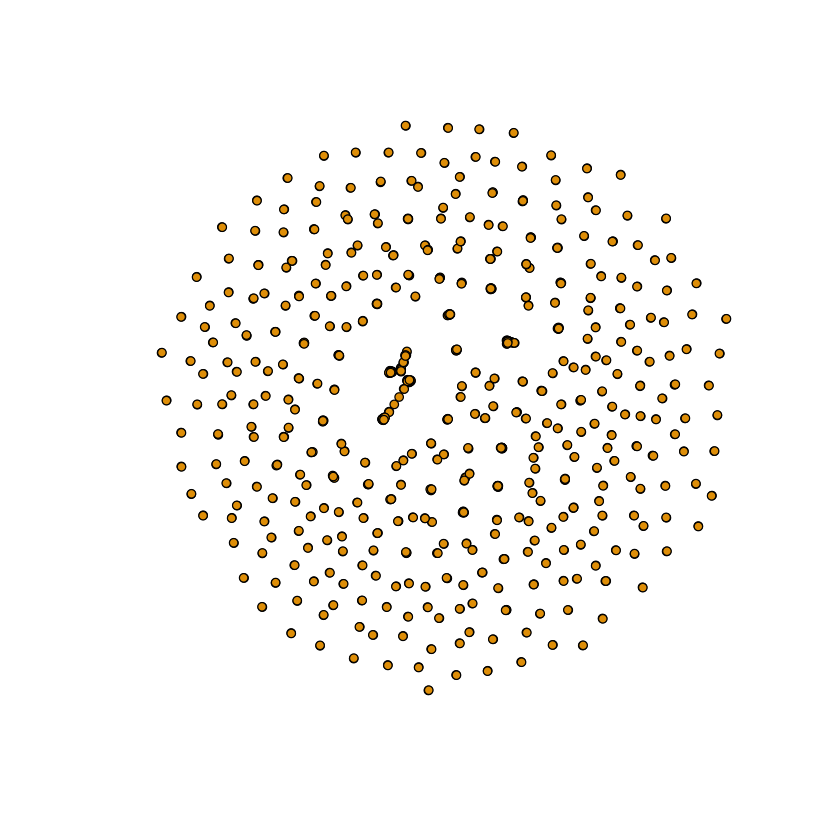

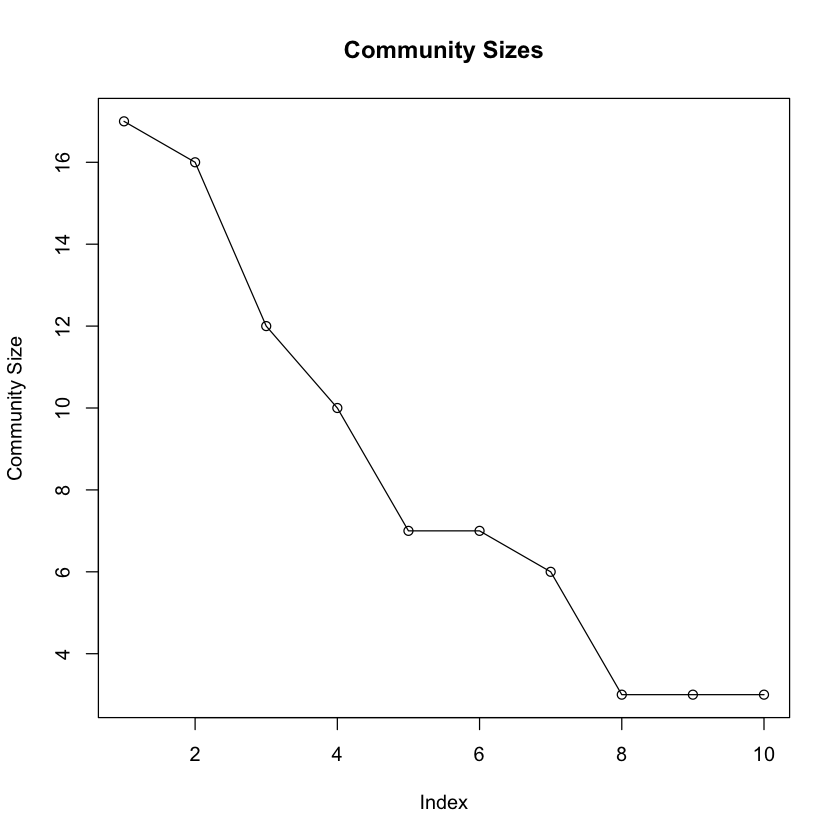

In [397]:
n = 1000
m = 1
deg_dist <- sample(1:1000,1000,replace = TRUE, prob = (1:1000)^-3) # Creating the distribution and sampling
if (sum(deg_dist) %% 2 != 0) {deg_dist[1] <- deg_dist[1] + 1} # Just a check to make sure degrees sum to even
network1 <- degree.sequence.game(out.deg=deg_dist, method = "simple.no.multiple") # Generating the random network by connecting the stubs
#g_p<-barabasi.game(10000,directed = FALSE)

#network1 <- sample_pa(n=n, m=m, directed=FALSE)
#network1 <- barabasi.game(n, m, directed=FALSE)
deg1 <- degree(network1)
cluster1 <- clusters(network1)
dg1 <- decompose.graph(network1)
gcc_index <- which.max(sapply(dg1,vcount))
gcc1 <- dg1[[gcc_index]]
vtx<-vcount(gcc)
#print(gcc_index)

#gcc1 = dg1[[1]]
community_structure1 <- fastgreedy.community(gcc1)
comm1 <- cluster_fast_greedy(gcc1)
modularity1 <- modularity(community_structure1)
writeLines(paste("Modularity of network1: ", modularity1))
writeLines(paste("Cinnectedness of network1: ", is.connected(network1)))
writeLines(paste("Diameter of network1: ", diameter(network1)))
writeLines(paste("Diameter of gcc1: ", diameter(gcc1)))
writeLines(paste("Nodes in network1: ", length(V(network1))))
writeLines(paste("Nodes in gcc1: ", length(V(gcc1))))

#plot( g_p, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
#plot( gcc1, vertex.size=3, vertex.label=NA, vertex.color="red", edge.arrow.size=0 )
print(paste("The number of structures in the graph is",length(comm1)))
print(paste("The modularity of the community structure is",modularity(comm1)))
plot( community_structure1, gcc1, vertex.size=3, vertex.label=NA )
plot(network1, vertex.size=3, vertex.label=NA, edge.arrow.size=0)
#legend("bottomright", legend=c("Network", "Community"), fill=c("lightblue", "red"))
#plot( gcc1, vertex.size=3, vertex.label=NA, vertex.color="red", edge.arrow.size=0 )

cm_size1 <- as.vector(sizes(community_structure1))
plot(cm_size1,main="Community Sizes",xlab="Index",ylab="Community Size")
lines(cm_size1)

Modularity of network2:  0.752218934911243
Cinnectedness of network2:  FALSE
Diameter of network2:  11
Diameter of gcc2:  10
Nodes in network2:  1000
Nodes in gcc2:  78
[1] "The number of structures in the graph is 9"
[1] "The modularity of the community structure is 0.752218934911243"


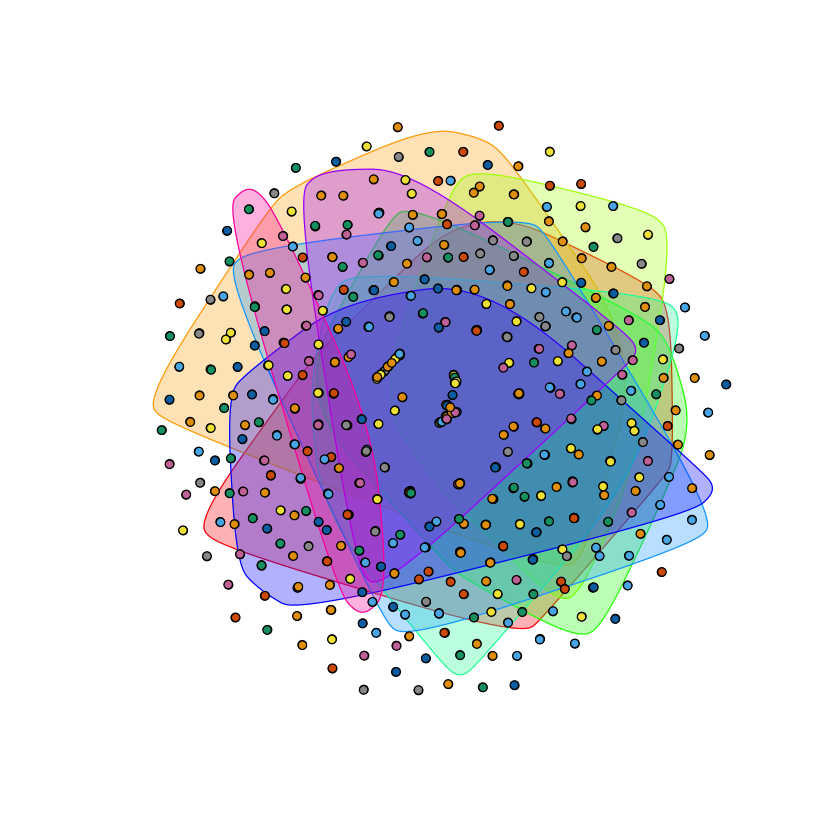

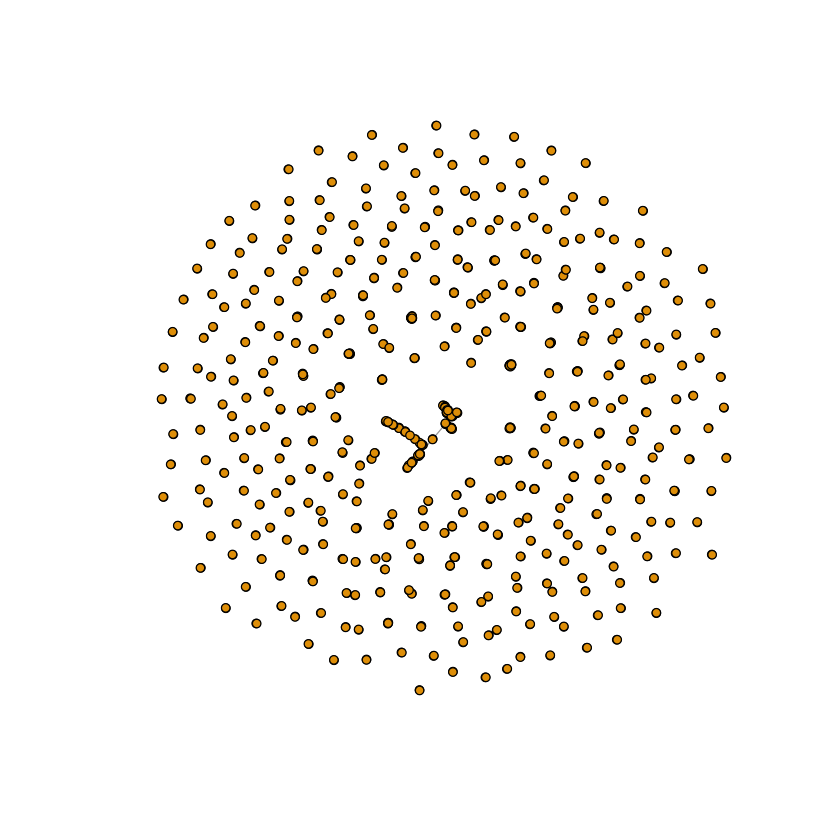

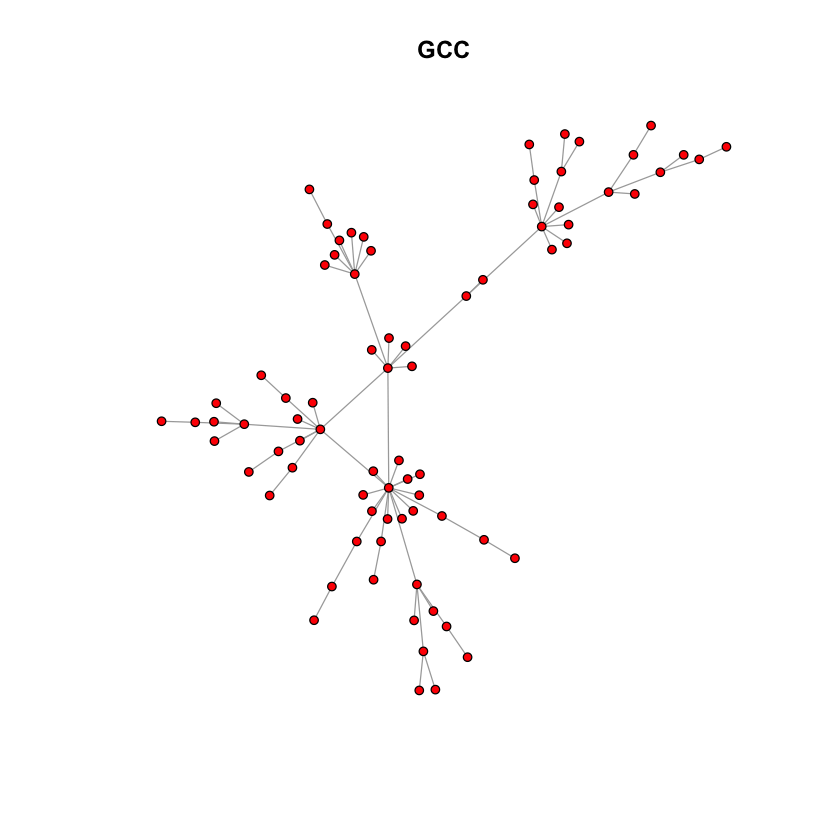

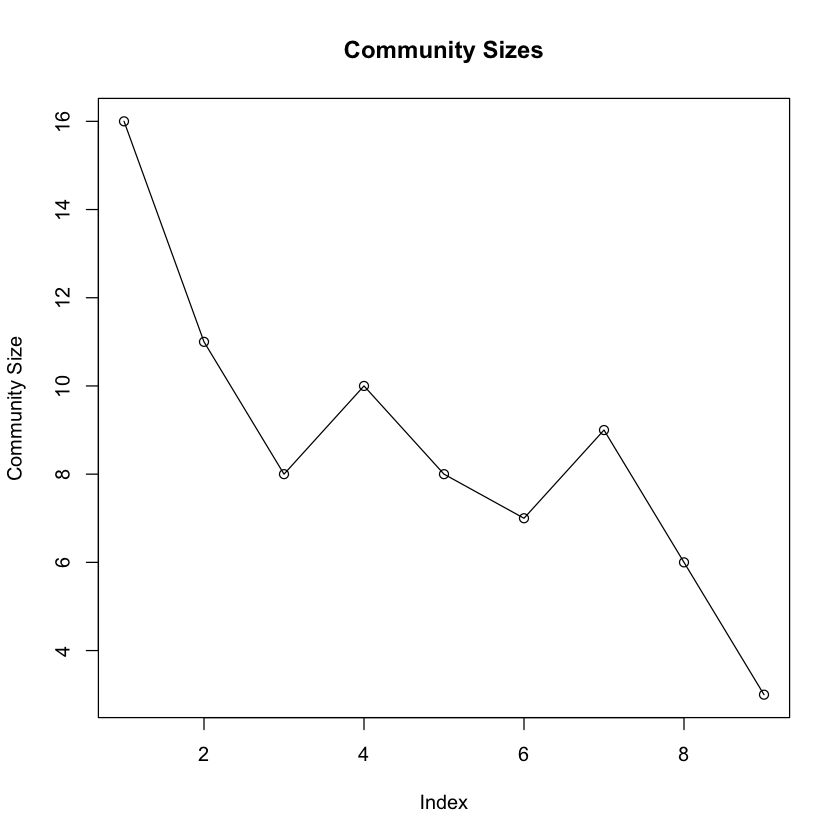

In [399]:
#network2 <- sample_pa(n=n, out.seq=deg1, directed=FALSE)
network2 <- degree.sequence.game(out.deg=deg1, method = "simple.no.multiple")
cluster2 <- clusters(network2)
dg2 <- decompose.graph(network2)
gcc_index <- which.max(sapply(dg2,vcount))
gcc2 <- dg2[[gcc_index]]
vtx<-vcount(gcc)
#print(gcc_index)

#gcc1 = dg1[[1]]
community_structure2 <- fastgreedy.community(gcc2)
comm2 <- cluster_fast_greedy(gcc2)
modularity2 <- modularity(community_structure2)
writeLines(paste("Modularity of network2: ", modularity2))
writeLines(paste("Cinnectedness of network2: ", is.connected(network2)))
writeLines(paste("Diameter of network2: ", diameter(network2)))
writeLines(paste("Diameter of gcc2: ", diameter(gcc2)))
writeLines(paste("Nodes in network2: ", length(V(network2))))
writeLines(paste("Nodes in gcc2: ", length(V(gcc2))))

#plot( g_p, vertex.size=2, vertex.label=NA, edge.arrow.size=0 )
print(paste("The number of structures in the graph is",length(comm2)))
print(paste("The modularity of the community structure is",modularity(comm2)))
plot( community_structure2, network2, vertex.size=3, vertex.label=NA, edge.arrow.size=0 )
plot(network2, vertex.size=3, vertex.label=NA, edge.arrow.size=0)
#legend("bottomright", legend=c("Network", "Community"), fill=c("lightblue", "red"))
plot( gcc2, vertex.size=3, vertex.label=NA, vertex.color="red", edge.arrow.size=0, main="GCC" )

cm_size2 <- as.vector(sizes(community_structure2))
plot(cm_size2,main="Community Sizes",xlab="Index",ylab="Community Size")
lines(cm_size2)